In [2]:
using ForwardDiff

In [3]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using BenchmarkTools

In [4]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements

In [5]:
# using Revise
using BAT 

In [6]:
using Plots

In [7]:
using Revise, Profile, PProf

In [8]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-1.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"], 
) 

images = load("../data/experiment/dataset_2/m2/images-satur.jld2");
event_number = 2

# Large Charge: Ev_2_2 = 2, Ev_2_1 = 311, Ev_2_3 = 440

event = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
);


In [9]:
# x0 = vcat([param_truth...]...)[1:35]

β = 0.015

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.08, 0.25), truncated(Normal(0.2, 0.04), 0.08, 0.25)],
        ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 6.0), truncated(Normal(4.0, 2.0), 2.0, 6.0)],
        waist = [Normal(2.9, 0.03)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 6.6 .. 9.9, 
        resx = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        resy = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        cam4_resx = truncated(Normal(1, 0.5), 0, Inf),
        cam4_resy = truncated(Normal(1, 0.5), 0, Inf),
        psx = [truncated(Normal(27.1, 27.1*β), 0., Inf), truncated(Normal(21.6, 21.6*β), 0., Inf), truncated(Normal(114.0, 114.0*β), 0., Inf)], # pixels are in microns
        psy = [truncated(Normal(30.5, 30.5*β), 0., Inf), truncated(Normal(23.4, 23.4*β), 0., Inf), truncated(Normal(125.0, 125.0*β), 0., Inf)],
        cam4_psx = truncated(Normal(91.0, 91.0*β), 0., Inf),
        cam4_psy = truncated(Normal(89.4, 89.4*β), 0., Inf),
        light_amp  = [5.0 .. 13.0 , 8.0 .. 17.0, 1.25 .. 4.2], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    ); # Large Charge

shape_t = valshape(prior)

# params_test = shape_t(x0);

In [10]:
# param_truth = (
#         tr_size = [0.2, 0.2],
#         ang_spr = [4.0, 4.0],
#         waist = [2.9,],
#         algmx = [35,35,20,35], 
#         algmy = [35,35,20,35], 
#         cam4_ped = 34.3,
#         cam4_light_fluct = 2.15,
#         cam4_light_amp = event.population*32.16870*10^-2,
#         resx = [0, 0, 0], 
#         resy = [0, 0, 0], 
#         cam4_resx = 0,
#         cam4_resy = 0,
#         psx = [27.1,21.6,114.], 
#         psy = [30.5,23.4,125.],
#         cam4_psx = 90.9, #3*0.0303*10^3,
#         cam4_psy = 89.4, #3*0.0298*10^3,
#         light_amp  = [event.population*35.14744*10^-2, event.population*50.23506*10^-2, event.population*10.09664*10^-2],
#         s_cam = [0.0, 1.478, 15.026, 23.1150], 
#     );

params_test = shape_t([0.1418327437968152, 0.1404847510266866, 3.945268095640469, 4.181119551611991, 
    2.922494146043868, 36.97878782285301, 37.43256458352776, 20.212769802151087, 33.84341277767488, 
    31.78701706838657, 32.24075067569645, 21.244796351735804, 35.24400397740663, 33.791478949317295, 
    2.0039408151193805, 8.40435847597421, 1.1998094548655378, 0.7983585581689502, 0.6158196092854202, 
    4.031291261325691, 1.0055385516461688, 2.5354209315874026, 1.6070031128260989, 0.4974610486558544, 
    26.808728066267335, 21.835931348807947, 114.8753763348248, 29.7740495677418, 24.018982271482713, 
    124.60874789371218, 90.75234974769708, 90.34973474369824, 8.167544129278339, 11.485445396088979, 2.5881219633410923])


ShapedAsNT((tr_size = [0.1418327437968152, 0.1404847510266866], ang_spr = [3.945268095640469, 4.181119551611991], waist = [2.922494146043868], algmx = [36.97878782285301, 37.43256458352776, 20.212769802151087, 33.84341277767488], algmy = [31.78701706838657, 32.24075067569645, 21.244796351735804, 35.24400397740663], cam4_ped = 33.791478949317295, cam4_light_fluct = 2.0039408151193805, cam4_light_amp = 8.40435847597421, resx = [1.1998094548655378, 0.7983585581689502, 0.6158196092854202], resy = [4.031291261325691, 1.0055385516461688, 2.5354209315874026], cam4_resx = 1.6070031128260989, cam4_resy = 0.4974610486558544, psx = [26.808728066267335, 21.835931348807947, 114.8753763348248], psy = [29.7740495677418, 24.018982271482713, 124.60874789371218], cam4_psx = 90.75234974769708, cam4_psy = 90.34973474369824, light_amp = [8.167544129278339, 11.485445396088979, 2.5881219633410923], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [11]:
function likelihood_cam4(
        params::NamedTuple, 
        image::Array{F,2},
        population::AbstractFloat,
        cam_ind::Integer;
        n_threads::Integer = Threads.nthreads()
    ) where {F <: AbstractFloat}
   

    VT = eltype(params.tr_size)
    tot_loglik::Array{VT} = zeros(VT, n_threads)    
    light_coefficient::VT = params.cam4_light_amp * 10^5
    
    δ_x::VT = params.cam4_psx * 10^-3
    δ_y::VT = params.cam4_psy * 10^-3
    
    @inbounds μ_x::VT  = params.algmx[cam_ind] * δ_x
    @inbounds μ_y::VT  = params.algmy[cam_ind] * δ_y
    
    @inbounds σ_x_1::VT = sqrt(params.tr_size[1]^2 + 10^-4*params.ang_spr[1]^2*(params.waist[1] - params.s_cam[cam_ind])^2)
    @inbounds σ_y_1::VT = sqrt(params.tr_size[2]^2 + 10^-4*params.ang_spr[2]^2*(params.waist[1] - params.s_cam[cam_ind])^2)
    
    σ_x::VT = sqrt(σ_x_1^2 + (params.cam4_resx*δ_x)^2)
    σ_y::VT = sqrt(σ_y_1^2 + (params.cam4_resy*δ_y)^2)
    
    Threads.@threads for t in eachindex(tot_loglik)
        
        cum_log_lik = zero(Float64) 
        
        @inbounds for pix_ind in CartesianIndices(image)[t:n_threads:length(image)] 
            @inbounds if !isnan(image[pix_ind])
                
                @inbounds x_edge = pix_ind.I[1] * δ_x
                @inbounds y_edge = pix_ind.I[2] * δ_y

                right_tmp, left_tmp = pdf(Normal(μ_x,σ_x), x_edge), pdf(Normal(μ_x,σ_x), x_edge - δ_x)
                pix_prediction = (left_tmp + 0.5*(right_tmp - left_tmp))*δ_x
                right_tmp, left_tmp = pdf(Normal(μ_y,σ_y), y_edge), pdf(Normal(μ_y,σ_y), y_edge - δ_y)
                pix_prediction *= (left_tmp + 0.5*(right_tmp - left_tmp))*δ_y
                
                pix_prediction = pix_prediction*light_coefficient + params.cam4_ped
                
#                 @inbounds cum_log_lik += logpdf(truncated(Normal(pix_prediction, params.cam4_light_fluct*sqrt(pix_prediction)), 0.0, 4096.0), image[pix_ind]) # pp+
                @inbounds cum_log_lik += logpdf(Normal(pix_prediction, params.cam4_light_fluct*sqrt(pix_prediction)), image[pix_ind]) # significantly speeds up auto diff
                
            end
        end
        
        @inbounds tot_loglik[t] = cum_log_lik
    end
    return sum(tot_loglik)
end


function likelihood_cam13(
        params::NamedTuple, 
        image::Array{F,2},
        population::AbstractFloat,
        cv_matrix::Array{C,2},
        cv_func::Function, 
        cam_ind::Integer;
        n_threads::Integer = Threads.nthreads()
    ) where {F <: AbstractFloat, C <: AbstractFloat}
    
    VT = eltype(params.tr_size)
    tot_loglik::Array{VT} = zeros(VT, n_threads)    
    
    light_coefficient::VT = params.light_amp[cam_ind] * 10^5
    
    δ_x::VT = params.psx[cam_ind] * 10^-3
    δ_y::VT = params.psy[cam_ind] * 10^-3
    
    @inbounds μ_x::VT  = params.algmx[cam_ind] * δ_x
    @inbounds μ_y::VT  = params.algmy[cam_ind] * δ_y
    
    @inbounds σ_x_1::VT = sqrt.(params.tr_size[1]^2 + 10^-4*params.ang_spr[1]^2*(params.waist[1] - params.s_cam[cam_ind])^2) 
    @inbounds σ_y_1::VT = sqrt.(params.tr_size[2]^2 + 10^-4*params.ang_spr[2]^2*(params.waist[1] - params.s_cam[cam_ind])^2) 
    
    σ_x::VT = sqrt(σ_x_1^2 + (params.resx[cam_ind]*δ_x)^2)
    σ_y::VT = sqrt(σ_y_1^2 + (params.resy[cam_ind]*δ_y)^2) # \sigma x is the same for both
    
    max_pred_amp = size(cv_matrix)[2]-1
    
    Threads.@threads for t in eachindex(tot_loglik)
        
        cum_log_lik = zero(Float64)
        
        @inbounds for pix_ind in CartesianIndices(image)[t:n_threads:length(image)] 
            @inbounds if !isnan(image[pix_ind])
                
                @inbounds x_edge = pix_ind.I[1] * δ_x
                @inbounds y_edge = pix_ind.I[2] * δ_y

                right_tmp, left_tmp = pdf(Normal(μ_x,σ_x), x_edge), pdf(Normal(μ_x,σ_x), x_edge - δ_x)
                pix_prediction = (left_tmp + 0.5*(right_tmp - left_tmp))*δ_x
                right_tmp, left_tmp = pdf(Normal(μ_y,σ_y), y_edge), pdf(Normal(μ_y,σ_y), y_edge - δ_y)
                pix_prediction *= (left_tmp + 0.5*(right_tmp - left_tmp))*δ_y

                pix_prediction = pix_prediction*light_coefficient

                if pix_prediction > max_pred_amp - 1
                    pix_prediction -= pix_prediction - (max_pred_amp - 1)
                end
                
                @inbounds cum_log_lik += cv_func(cv_matrix, image[pix_ind], pix_prediction)
                
            end
        end
        tot_loglik[t] = cum_log_lik
        
    end

    return sum(tot_loglik)
end

function conv_tabl_discrete(cv_matrix::Array{F,2}, observed::Real, expected::Real) where {F<:AbstractFloat}  
    return cv_matrix[convert(Integer, observed+1), round(Integer, expected+1)]     
end

function conv_tabl_cont(cv_matrix::Array{F,2}, observed::Real, expected::Real) where {F<:AbstractFloat}   
    
    left_exp, right_exp = floor(Integer, expected+1), ceil(Integer, expected+1)
    exp_rem = mod(expected+1, 1)
    left_prob, right_prob = cv_matrix[convert(Integer, observed+1), left_exp], cv_matrix[convert(Integer, observed+1), right_exp]
    int_prob = log(left_prob + (right_prob - left_prob)*exp_rem)
    return int_prob

end


function log_lik_diff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_cont,
    cv_1 = exp.(cv_mat.cam_1),
    cv_2 = exp.(cv_mat.cam_2),
    cv_3 = exp.(cv_mat.cam_3),
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
    
end

function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end



log_lik_ndiff (generic function with 1 method)

In [12]:
log_likelihood = log_lik_diff()
# log_likelihood = log_lik_ndiff()

#6 (generic function with 1 method)

In [13]:
posterior = PosteriorDensity(log_likelihood, prior);

### Benchmark 1:  

In [14]:
log_likelihood(params_test[1])

LogDVal{Float64}(-74672.12041575988)

In [15]:
@benchmark log_likelihood($params_test[1])

BenchmarkTools.Trial: 
  memory estimate:  293.58 KiB
  allocs estimate:  259
  --------------
  minimum time:     438.863 μs (0.00% GC)
  median time:      540.972 μs (0.00% GC)
  mean time:        741.786 μs (0.00% GC)
  maximum time:     18.350 ms (0.00% GC)
  --------------
  samples:          6725
  evals/sample:     1

### Benchmark 2:  

In [16]:
BAT.eval_logval(posterior, params_test)

-74741.1848349571

In [17]:
@benchmark BAT.eval_logval($posterior, $params_test)

BenchmarkTools.Trial: 
  memory estimate:  305.73 KiB
  allocs estimate:  465
  --------------
  minimum time:     457.566 μs (0.00% GC)
  median time:      572.740 μs (0.00% GC)
  mean time:        893.260 μs (0.00% GC)
  maximum time:     18.664 ms (0.00% GC)
  --------------
  samples:          5594
  evals/sample:     1

### Benchmark 3:  

In [18]:
gradient_tmp = BAT.eval_gradlogval(posterior, params_test)

(logd = -74741.1848349571, grad_logd = ShapedAsNT((tr_size = [-3271.8950316007263, -2810.7583397047856], ang_spr = [-150.2057450242464, -52.504529571712766], waist = [-98.02158330382592], algmx = [-53.32468642979882, -25.204878697107624, -41.4219254701462, 0.7537213450661102], algmy = [-60.13046094656731, 32.63437200857609, 3.5271104770250323, 24.55975451180336], cam4_ped = -5.075496253024629, cam4_light_fluct = -13.45618241063848, cam4_light_amp = -20.987950995796805, resx = [-8.263447771088074, -4.354633815130297, -3.884456620412106], resy = [-1.3643738460140327, -13.229792550456201, -22.21321344104478], cam4_resx = -8.297195641398089, cam4_resy = 1.5731947390436067, psx = [12.55037818880729, 12.259939550970481, 1.1415951533748132], psy = [-0.0375686679998779, 17.14119732220402, 1.0149609078485777], cam4_psx = 3.3323476714484888, cam4_psy = 0.34429390880317423, light_amp = [20.435693506374488, -10.292606718185906, -14.856769398998043], s_cam = 4-element Fill{Float64}: entries equal t

In [19]:
gradient_tmp.logd

-74741.1848349571

In [20]:
@benchmark BAT.eval_gradlogval($posterior, $params_test)

BenchmarkTools.Trial: 
  memory estimate:  993.63 KiB
  allocs estimate:  1582
  --------------
  minimum time:     3.476 ms (0.00% GC)
  median time:      3.769 ms (0.00% GC)
  mean time:        4.358 ms (0.00% GC)
  maximum time:     66.987 ms (0.00% GC)
  --------------
  samples:          1147
  evals/sample:     1

### Benchmark 4:  

In [ ]:
cv_tmp = exp.(conv_matrices.cam_1)

function ld(x::AbstractVector{R}; e = event, cv = cv_tmp, f = conv_tabl_cont) where {R <: Real}
    
    tmp_v = shape_t(x)
#     return likelihood_cam4(tmp_v[1], e.cam_4, e.population, 4)
    return likelihood_cam13(tmp_v[1], e.cam_1, e.population, cv, f, 1)
end
    
    
grad1(x) = ForwardDiff.gradient(ld, x)

# no truncation : -21680.722529592607
# truncation : -21677.25196635643

#

In [ ]:
pvect = unshaped(params_test);

In [ ]:
ld(pvect)

In [ ]:
@benchmark ld($pvect)

In [ ]:
grad1(pvect)

In [ ]:
@benchmark grad1($pvect)

## Profilling: 

In [25]:
Profile.clear()

In [26]:
Profile.init()

(1000000, 0.001)

In [27]:
# @profile (for i = 1:50; BAT.eval_logval(posterior, params_test) ; end) 
# @profile (for i = 1:50; BAT.eval_gradlogval(posterior, params_test) ; end) 
@profile (for i = 1:50; log_likelihood(params_test[1]) ; end) 

In [28]:
pprof(;web=true, webport=58599, full_signatures=true, )

"profile.pb.gz"

Main binary filename not available.
Serving web UI on http://localhost:58599


In [29]:
PProf.refresh(file = "profile.pb.gz", webport=58599,)

Main binary filename not available.
Serving web UI on http://localhost:58599


Process(`/Users/vhafych/.julia/artifacts/bb592156ff0423fc6577001f9e7d4c2c71e7f8c0/bin/pprof -http=localhost:58599 -relative_percentages profile.pb.gz`, ProcessRunning)

In [ ]:
PProf.kill()

In [ ]:
Profile.clear()

## Gradient Projections: 

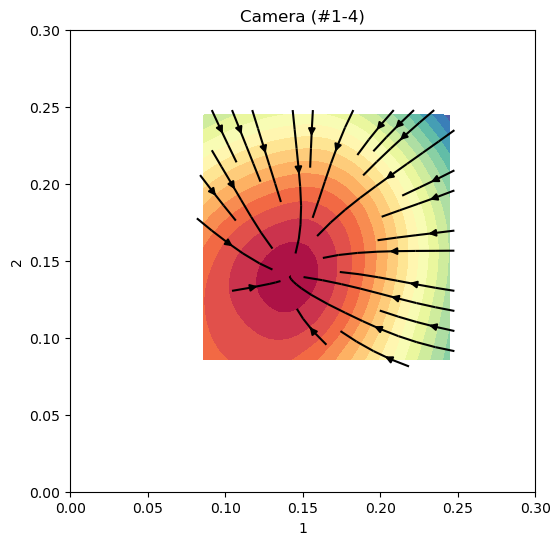

PyObject Text(24.000000000000007, 0.5, '2')

In [39]:
xrange = range(0.0, stop = 0.3, length=50)
yrange = range(0.0, stop = 0.3, length=50)

x_coor = [x for x in xrange, y in yrange]'
y_coor = [y for x in xrange, y in yrange]'

zx = zeros(length(xrange), length(yrange))
zy = zeros(length(xrange), length(yrange))
z_val = zeros(length(xrange), length(yrange))

ind_1 = 1
ind_2 = 2

vector_p = deepcopy(unshaped(params_test))

for (x_ind, x) in enumerate(xrange), (y_ind, y) in enumerate(yrange)
    
    vector_p[ind_1] = x
    vector_p[ind_2] = y
    grad_res = BAT.eval_gradlogval(posterior, shape_t(vector_p))
    grad_tmp = unshaped(grad_res.grad_logd)
    zx[x_ind, y_ind] = grad_tmp[ind_1]
    zy[x_ind, y_ind] = grad_tmp[ind_2]
    z_val[x_ind, y_ind] = grad_res.logd
end

fig, ax = subplots(1,1, figsize=(6,6))

speed = sqrt.(zx.^2 .+ zy.^2);
lw = 4 .* speed ./ maximum(speed)

ax.contourf(xrange, yrange, z_val', cmap="Spectral_r", levels=20)
ax.streamplot(x_coor,y_coor,zx',zy',density=0.8,color="k",)

ax.set_xlim(minimum(xrange), maximum(xrange))
ax.set_ylim(minimum(yrange), maximum(yrange))

ax.set_title("Camera (#1-4)")

ax.set_xlabel(ind_1)
ax.set_ylabel(ind_2)

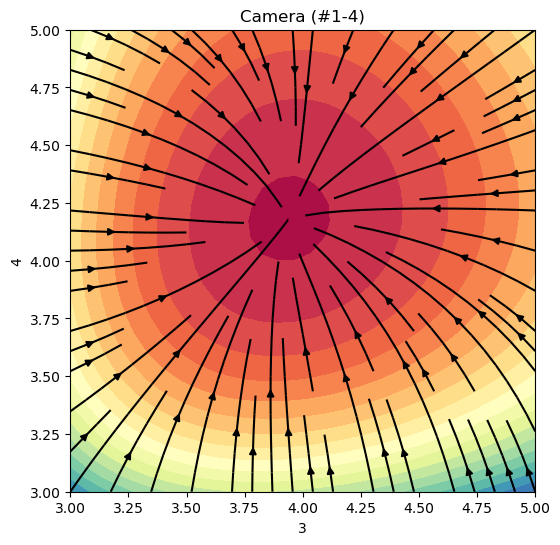

PyObject Text(24.000000000000007, 0.5, '4')

In [37]:
xrange = range(3.0, stop = 5.0, length=30)
yrange = range(3.0, stop = 5.0, length=30)

x_coor = [x for x in xrange, y in yrange]'
y_coor = [y for x in xrange, y in yrange]'

zx = zeros(length(xrange), length(yrange))
zy = zeros(length(xrange), length(yrange))
z_val = zeros(length(xrange), length(yrange))

ind_1 = 3
ind_2 = 4

vector_p = deepcopy(unshaped(params_test))

for (x_ind, x) in enumerate(xrange), (y_ind, y) in enumerate(yrange)

    vector_p[ind_1] = x
    vector_p[ind_2] = y
    grad_res = BAT.eval_gradlogval(posterior, shape_t(vector_p))
    grad_tmp = unshaped(grad_res.grad_logd)
    zx[x_ind, y_ind] = grad_tmp[ind_1]
    zy[x_ind, y_ind] = grad_tmp[ind_2]
    z_val[x_ind, y_ind] = grad_res.logd
end

fig, ax = subplots(1,1, figsize=(6,6))

speed = sqrt.(zx.^2 .+ zy.^2);
lw = 4 .* speed ./ maximum(speed)

ax.contourf(xrange, yrange, z_val', cmap="Spectral_r", levels=20)
ax.streamplot(x_coor,y_coor,zx',zy',density=0.8,color="k",)

ax.set_xlim(minimum(xrange), maximum(xrange))
ax.set_ylim(minimum(yrange), maximum(yrange))

ax.set_title("Camera (#1-4)")

ax.set_xlabel(ind_1)
ax.set_ylabel(ind_2)

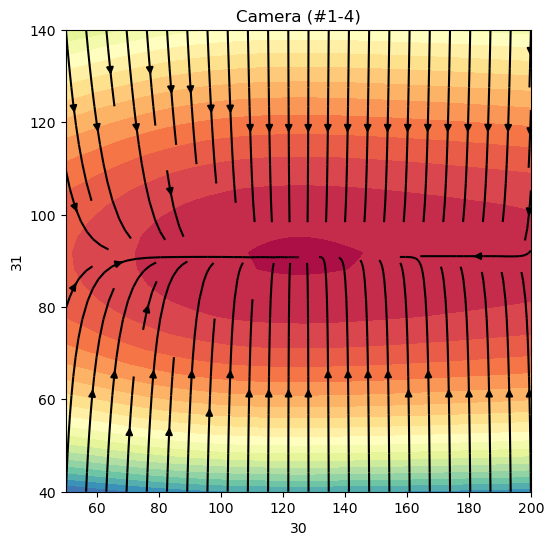

PyObject Text(24.000000000000007, 0.5, '31')

In [38]:
xrange = range(50.0, stop = 200.0, length=30)
yrange = range(40.0, stop = 140.0, length=30)

x_coor = [x for x in xrange, y in yrange]'
y_coor = [y for x in xrange, y in yrange]'

zx = zeros(length(xrange), length(yrange))
zy = zeros(length(xrange), length(yrange))
z_val = zeros(length(xrange), length(yrange))

ind_1 = 30
ind_2 = 31

vector_p = deepcopy(unshaped(params_test))

for (x_ind, x) in enumerate(xrange), (y_ind, y) in enumerate(yrange)

    vector_p[ind_1] = x
    vector_p[ind_2] = y
    grad_res = BAT.eval_gradlogval(posterior, shape_t(vector_p))
    grad_tmp = unshaped(grad_res.grad_logd)
    zx[x_ind, y_ind] = grad_tmp[ind_1]
    zy[x_ind, y_ind] = grad_tmp[ind_2]
    z_val[x_ind, y_ind] = grad_res.logd
end

fig, ax = subplots(1,1, figsize=(6,6))

speed = sqrt.(zx.^2 .+ zy.^2);
lw = 4 .* speed ./ maximum(speed)

ax.contourf(xrange, yrange, z_val', cmap="Spectral_r", levels=20)
ax.streamplot(x_coor,y_coor,zx',zy',density=0.8,color="k",)

ax.set_xlim(minimum(xrange), maximum(xrange))
ax.set_ylim(minimum(yrange), maximum(yrange))

ax.set_title("Camera (#1-4)")

ax.set_xlabel(ind_1)
ax.set_ylabel(ind_2)

## Dual Numbers: 

In [ ]:
using DualNumbers

In [ ]:
param_truth = (
    tr_size = [Dual(0.14, 0.14), Dual(0.14, 0.14)], 
    ang_spr = [Dual(3.96, 3.96), Dual(3.96, 3.96)], 
    waist = [ Dual(2.92, 2.92)], 
    algmx = [Dual(33.7, 2.92), Dual(34.546, 34.546), Dual(20.6, 20.6), Dual(35.43, 35.43)], 
    algmy = [Dual(36.06, 36.06), Dual(37.37, 37.37), Dual(21.83, 21.83), Dual(34.941, 34.941)], 
    cam4_ped = Dual(32.75, 32.75), 
    cam4_light_fluct = Dual(2.19135, 2.19135), 
    cam4_light_amp = Dual(8.82,  8.82), 
    resx = [Dual(0.80515,  0.80515), Dual(0.54,  0.54), Dual(0.73,  0.73)], 
    resy = [3.7794370837087508, 0.6186676377752929, 2.565553468252872], 
    cam4_resx = 1.339082789468911, 
    cam4_resy = 1.2429021486346863, 
    psx = [27.123268870682487, 21.89402537577619, 115.56357977889763], 
    psy = [29.323407884013157, 23.814076209426148, 124.38805051756697], 
    cam4_psx = 90.65358820186805, 
    cam4_psy = 90.67947529363211, 
    light_amp = [8.738368829879834, 11.950987284247667, 2.7858070849651555], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
)

In [ ]:
realpart()

In [ ]:
# log_likelihood(param_truth)

In [ ]:
# gradient_tmp.grad_logd[1].tr_size = [1,1]